In [35]:
# importing osmnx library
import osmnx as ox
# matplot to draw
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import pandas as pd
from pyproj import CRS



In [36]:
# Specify the name that is used to seach for the data
place_name = "miskolc university"

In [37]:
# Fetch OSM street network from the location
# name have to be  geocodable which means that
# the place name should exist in the OpenStreetMap database 
# using function named graph_from_place
# return graph object
graph = ox.graph_from_place(place_name)

In [38]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

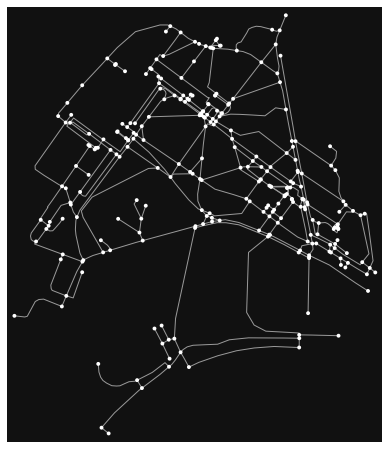

In [39]:
# Plot the streets
# using the plot graph function from the osmnx library
# return fig, axes object
fig, ax = ox.plot_graph(graph)

In [40]:
# tis code to configer the ox library to make it aple to
# load and save the model

# this section uses grph ml files 

utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)
# # save a graph
# G = ox.graph_from_place('Piedmont, CA, USA', network_type='drive')
# ox.save_graphml(graph, filepath='miskolc_osmnx.osm')
# # load a graph
# x = ox.load_graphml( filepath='miskolc_osmnx_road.osm')
# ox.plot_graph(x)

In [44]:
# you can load an xml model after dowload it from openstreetmaps
# create graph from .osm extract file
G = ox.graph_from_xml("highway.osm")
fig, ax = ox.plot_graph(G)

TypeError: graph_from_xml() got an unexpected keyword argument 'network_type'

In [43]:
ox.save_graphml(G, filepath='highwaygraph.osm')

In [183]:
# OSMnx provides a convenient function graph_to_gdfs()
# that can convert the graph into two separate GeoDataFrames where the first one contains the information about
# the nodes and the second one about the edge.
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [184]:
# see the structure of the geodataframes
# return objects from geopandas 
print(type(nodes))
print(nodes.head())
print(edges.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
                   y          x  street_count highway  \
osmid                                                   
474694711  48.075046  20.764024             3     NaN   
892217954  48.079339  20.767159             3     NaN   
892217985  48.079429  20.763061             3     NaN   
894533600  48.082929  20.769090             3     NaN   
894533608  48.080047  20.769859             3     NaN   

                            geometry  
osmid                                 
474694711  POINT (20.76402 48.07505)  
892217954  POINT (20.76716 48.07934)  
892217985  POINT (20.76306 48.07943)  
894533600  POINT (20.76909 48.08293)  
894533608  POINT (20.76986 48.08005)  
                              osmid      highway  oneway   length        name  \
u         v          key                                                        
474694711 1670331292 0    154545121  residential   False   20.648         NaN   
892217954 894534342  0    521650290  r

In [185]:
# Get place boundary related to the place name as a geodataframe
# we can use this function to retrieve an area in gdf format directly
area = ox.geocode_to_gdf(place_name)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
# you can see shape and type of this gdf object
print(type(area))
print(area.shape)
print(area)

<class 'geopandas.geodataframe.GeoDataFrame'>
(1, 14)
                                            geometry  bbox_north  bbox_south  \
0  POLYGON ((20.76069 48.07911, 20.76086 48.07733...   48.083856   48.073889   

   bbox_east  bbox_west   place_id osm_type     osm_id        lat        lon  \
0  20.772143  20.760694  116417020      way  118934146  48.078795  20.766386   

                                        display_name    class        type  \
0  University of Miskolc, Magyarka, Hejőpark, Egy...  amenity  university   

   importance  
0       0.201  


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

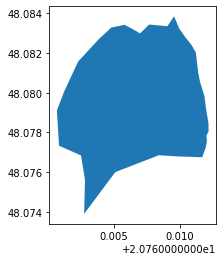

In [187]:
# Plot the area:
area.plot()

In [188]:
# It is also possible to retrieve other
# types of OSM data features with OSMnx such as buildings
# List key-value pairs for tags
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
# print info
print(type(buildings))
print(buildings.shape)
print(buildings.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
(52, 24)
       unique_id      osmid element_type  \
0  way/118933522  118933522          way   
1  way/118933524  118933524          way   
2  way/118933526  118933526          way   
3  way/118933528  118933528          way   
4  way/118933530  118933530          way   

                                            geometry  \
0  POLYGON ((20.77020 48.08181, 20.76945 48.08217...   
1  POLYGON ((20.77134 48.07870, 20.77101 48.07886...   
2  POLYGON ((20.76409 48.07680, 20.76408 48.07668...   
3  POLYGON ((20.76709 48.08207, 20.76777 48.08270...   
4  POLYGON ((20.76953 48.08161, 20.77042 48.08121...   

                              name old_name  amenity  \
0             E/5 Bolyai Kollégium      NaN      NaN   
1                Uni Hotel Miskolc      E/0  college   
2  Kemény Dénes Városi Sportuszoda      NaN      NaN   
3                              A/2      NaN      NaN   
4             E/4 Bolyai Kollégium      NaN      NaN   

      

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
# Let’s check how many building footprints we received:
print(len(buildings))

52


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
# you can know how manny columns
print(buildings.columns)

Index(['unique_id', 'osmid', 'element_type', 'geometry', 'name', 'old_name',
       'amenity', 'nodes', 'building', 'alt_name', 'leisure', 'office',
       'old_name:hu', 'building:levels', 'capacity', 'sport', 'start_date',
       'addr:city', 'addr:postcode', 'ways', 'alt_name:hu', 'outdoor_seating',
       'smoking', 'type'],
      dtype='object')


In [192]:
# It is also possible to retrieve other types of geometries 
# from OSM using the geometries_from_place by passing different tags.
# Point-of-interest (POI) is a generic concept that describes point locations 
# that represent places of interest.

# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
print(len(restaurants))

# print some data to show the structure
print(restaurants.columns)
print(type(restaurants))
print(restaurants.shape)
print(restaurants.head())

3
Index(['unique_id', 'osmid', 'element_type', 'amenity', 'geometry',
       'amenity_1', 'name', 'outdoor_seating', 'nodes', 'building',
       'building:levels', 'ways', 'alt_name:hu', 'smoking', 'type'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
(3, 15)
          unique_id       osmid element_type     amenity  \
0   node/4915252198  4915252198         node  restaurant   
1   node/5100995209  5100995209         node  restaurant   
2  relation/7332279     7332279     relation  restaurant   

                                            geometry amenity_1      name  \
0                          POINT (20.76362 48.08173)       NaN       NaN   
1                          POINT (20.77129 48.07874)       pub  Uni-Café   
2  POLYGON ((20.76899 48.07980, 20.76874 48.07957...       NaN   Étterem   

  outdoor_seating                                              nodes building  \
0             NaN                                                NaN      NaN   
1        

In [193]:
# Available columns
restaurants.columns.values

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['unique_id', 'osmid', 'element_type', 'amenity', 'geometry',
       'amenity_1', 'name', 'outdoor_seating', 'nodes', 'building',
       'building:levels', 'ways', 'alt_name:hu', 'smoking', 'type'],
      dtype=object)

In [194]:
# Select some useful cols and print
cols = ['name', 'outdoor_seating', 'smoking', 'type']

# Print only selected cols
restaurants[cols]

,name,outdoor_seating,smoking,type
0,NaN,NaN,NaN,NaN
1,Uni-Café,yes,NaN,NaN
2,Étterem,no,no,multipolygon


AxesSubplot(0.125,0.125;0.775x0.755)


NameError: name 'area' is not defined

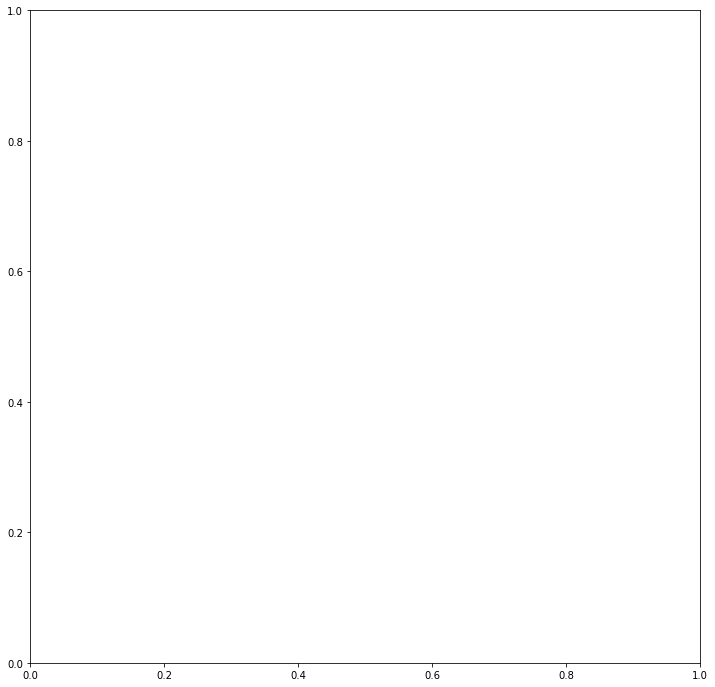

In [34]:
# Let’s create a map out of the streets, buildings,
# restaurants, and the area Polygon but let’s exclude the nodes 
fig, ax = plt.subplots(figsize=(12,12))
# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.6)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.4, markersize=10)
plt.tight_layout()

In [196]:
# get park places
# List key-value pairs for tags
tags = {'leisure': 'park'}

# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Retrieved 1 objects


In [197]:
# print the info
print(parks)
print(parks.columns.values)

       unique_id      osmid element_type  \
0  way/484281024  484281024          way   

                                               nodes leisure      name  \
0  [4770238003, 4770238004, 4770238005, 477023800...    park  Díszkert   

                                            geometry  
0  POLYGON ((20.76376 48.08180, 20.76383 48.08186...  
['unique_id' 'osmid' 'element_type' 'nodes' 'leisure' 'name' 'geometry']


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


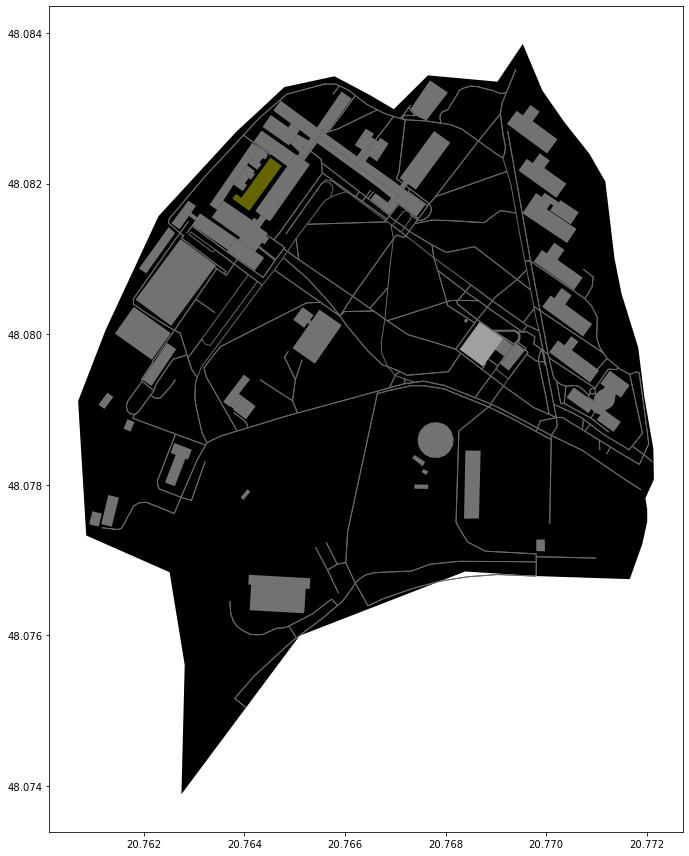

In [198]:
# Let’s create a map out of the streets, buildings, parks
fig, ax = plt.subplots(figsize=(12,12))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.6)

# Plot parks
parks.plot(ax=ax, color='yellow', alpha=0.4, markersize=10)
plt.tight_layout()

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


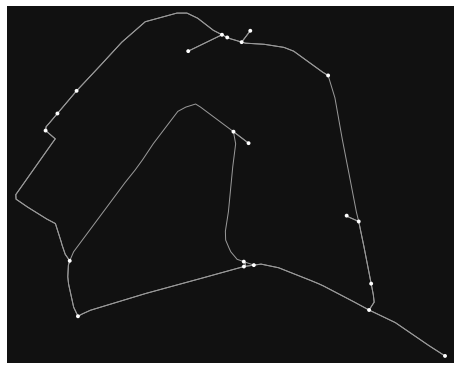

In [199]:
#  only the drivable network
graph = ox.graph_from_place(place_name, network_type='drive')

# Plot the graph:
fig, ax = ox.plot_graph(graph)



In [200]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
# some info about the roads
# Check columns
print(edges.shape)
print(edges.columns)
print(edges.head())


(42, 8)
Index(['osmid', 'name', 'highway', 'oneway', 'length', 'geometry', 'lanes',
       'access'],
      dtype='object')
                                                                 osmid  \
u         v          key                                                 
892217954 894534342  0                                       521650290   
          5082471671 0                                       521650292   
          1014439558 0                                       521650294   
892217985 1014439558 0                                       154545124   
          1336879816 0    [530286883, 530286884, 521650293, 118931055]   

                                name      highway  oneway   length  \
u         v          key                                             
892217954 894534342  0    Egyetem út  residential   False   17.436   
          5082471671 0           NaN  residential   False   10.599   
          1014439558 0    Egyetem út  residential   False  303.191   
8922179

In [202]:
# to know what are the types of the roads
edges['highway'].value_counts()

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


residential     40
unclassified     2
Name: highway, dtype: int64

In [203]:
# As the data is in WGS84 format, we might want to reproject
# our data into a metric system before proceeding to the shortest
# path analysis. We can re-project the graph from latitudes and longitudes
# to an appropriate UTM zone using the project_graph() function from OSMnx.

# I think that step is not nececcary if I worked with bosch map
# because it already uses two deminsional coordinate system like UTM

# Project the data
graph_proj = ox.project_graph(graph) 

<class 'networkx.classes.multidigraph.MultiDiGraph'>


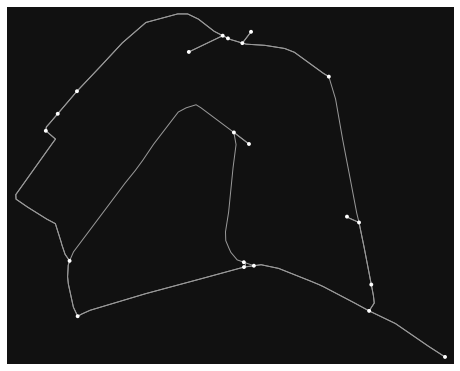

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [204]:
print(type(graph_proj))
ox.plot_graph(graph_proj)

In [205]:
# Get Edges and Nodes from the projected graph
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
# you can notice that the coordination have been changed to the UTM system
print(edges_proj.head())
print(nodes_proj.head())

                              osmid        name      highway  oneway   length  \
u         v          key                                                        
892217954 894534342  0    521650290  Egyetem út  residential   False   17.436   
          5082471671 0    521650292         NaN  residential   False   10.599   
          1014439558 0    521650294  Egyetem út  residential   False  303.191   
894534342 892217954  0    521650290  Egyetem út  residential   False   17.436   
          5082471671 0    521650291         NaN  residential    True   18.568   

                                                                   geometry  \
u         v          key                                                      
892217954 894534342  0    LINESTRING (482657.754 5325144.706, 482675.071...   
          5082471671 0    LINESTRING (482657.754 5325144.706, 482660.153...   
          1014439558 0    LINESTRING (482657.754 5325144.706, 482637.456...   
894534342 892217954  0    LINESTRING 

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
# show some info
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=34 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
# to see epsg code
CRS(edges_proj.crs).to_epsg()

32634

In [208]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 21,
 'm': 42,
 'k_avg': 4.0,
 'intersection_count': 17,
 'streets_per_node_avg': 2.6666666666666665,
 'streets_per_node_counts': {0: 0, 1: 4, 2: 0, 3: 16, 4: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.19047619047619047,
  2: 0.0,
  3: 0.7619047619047619,
  4: 0.047619047619047616},
 'edge_length_total': 5008.371999999999,
 'edge_length_avg': 119.24695238095237,
 'street_length_total': 2984.589000000001,
 'street_length_avg': 129.76473913043483,
 'street_segments_count': 23,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0740166532856015,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


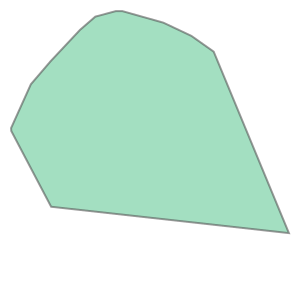

In [209]:
# the surrounding area
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Show output
convex_hull

In [210]:
# Here, we combine the basic and extended statistics
# into one pandas Series to keep things in more compact form.

# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value
    
# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                     21
m                                                                                     42
k_avg                                                                                4.0
intersection_count                                                                    17
streets_per_node_avg                                                            2.666667
streets_per_node_counts                                  {0: 0, 1: 4, 2: 0, 3: 16, 4: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.19047619047619047, 2: 0.0, 3: 0....
edge_length_total                                                               5008.372
edge_length_avg                                                               119.246952
street_length_total                                                             2984.589
street_length_avg                                                             129.764739
street_segments_count

In [211]:
# Set place name to be the source to calculate the shortest path to the 
# distination

place = "Uni Hotel Miskolc"

# Geocode the place name
geocoded_place = ox.geocode_to_gdf(place)

# Check the result
geocoded_place



C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((20.77041 48.07916, 20.77084 48.07895...",48.079516,48.078702,20.77166,20.770405,116410916,way,118933524,48.079109,20.770722,"Uni Hotel Miskolc, Egyetem út, Hejőpark, Egyet...",amenity,college,0.311


In [212]:
#  From here, we can get the centroid as the source location of our shortest path analysis. 
# However, we first need to project the data into the correct crs:

# I think this step is not neccessary in bosch map
# because the map already in two deminsional coordination system

# Re-project 
geocoded_place.to_crs(CRS(edges_proj.crs), inplace=True)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

print(origin)


POINT (482952.6045887025 5325120.572182517)


In [214]:
# the distination point
# I choosed a point in an intersection

place2 = "miskolc university A/6"

# Geocode the place name
geocoded_place2 = ox.geocode_to_gdf(place2)

# Check the result
geocoded_place2

# Re-project 
geocoded_place2.to_crs(CRS(edges_proj.crs), inplace=True)

# Get centroid as shapely point
destination = geocoded_place2["geometry"].centroid.values[0]

print(destination)

POINT (482604.3883094022 5325159.118193766)


In [215]:
# According to the documentation of this function, we need to
# parse Point coordinates as coordinate-tuples in this order:
#     latitude, longitude(or y, x). 

# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
print(orig_node_id)

# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
print(target_node_id)

894533610
5082471671


In [216]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

print(type(orig_node))

<class 'pandas.core.series.Series'>


In [217]:
# Let’s also create a GeoDataFrame that contains these points
# these two points now are geo frames
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()



,y,x,street_count,lon,lat,geometry
894533610,5.325114e+06,482880.563799,3,20.770152,48.079070,POINT (482880.564 5325114.082)
5082471671,5.325153e+06,482657.504144,3,20.767155,48.079416,POINT (482657.504 5325153.231)


In [218]:
# find the shortest path between the 
# origin and target locations by using the shortest_path()
# function of networkx. With weight -parameter we can specify that 'length'

# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')

# Show what we have
print(route)

[894533610, 894533612, 894534342, 5082471671]


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


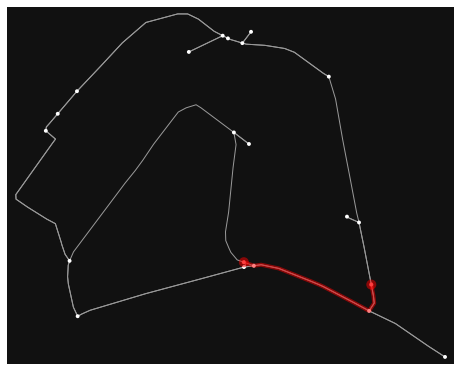

In [219]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)